In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
# Plotly visualizations
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(usernam

ModuleNotFoundError: No module named 'plotly'

In [409]:
df = pd.read_csv('./input/loans.csv')

#loan_data['issue_date'] = pd.to_datetime(loan_data['issue_date'], format = '%b-%y')
#loan_data['earliest_credit_line'] = pd.to_datetime(loan_data['earliest_credit_line'], format = '%b-%y')

#Create Target Variable
df['Is_Good'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',                                                       
                                                       'Late (> 90 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met. Create a scorce Card

# Drop irrelevant columns
df.drop(['account_id', 'postcode_district','title'], axis=1, inplace=True)

df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



,installment,loan_amount,interest_rate,term,purpose,issue_date,description,home_ownership,annual_income,employment_length,job_title,earliest_credit_line,public_records,last_record_months,last_delinquency_months,last_derog_months,delinquency_2y,inquiries_6m,open_accounts,debt_to_income,credit_card_usage,credit_card_balance,total_current_balance,nr_accounts,loan_status,amount_payed,year,district,credit_score,Is_Good
0,829.10,25000.0,11.89,36 months,debt_consolidation,Aug-2009,Due to a lack of personal finance education an...,RENT,85000.0,< 1 year,NaN,Feb-1994,0.0,NaN,NaN,NaN,0.0,0.0,10.0,19.48,52.1,28854.0,NaN,42.0,Fully Paid,29324.320000,2009,Liverpool,710.699725,1
1,40.50,1200.0,13.11,36 months,debt_consolidation,Mar-2010,"If funded, I would use this loan consolidate t...",OWN,54000.0,10+ years,city of beaumont texas,Jan-1985,0.0,NaN,64.0,NaN,0.0,0.0,5.0,5.47,40.4,2584.0,NaN,31.0,Fully Paid,1457.310000,2010,Redbridge,416.086929,1
2,366.86,10800.0,13.57,36 months,debt_consolidation,Nov-2009,I currently have a personal loan with Citifina...,RENT,32000.0,6 years,State Farm Insurance,Dec-1996,0.0,NaN,58.0,NaN,0.0,1.0,14.0,11.63,25.6,3511.0,NaN,40.0,Fully Paid,13195.270000,2009,Rugby,354.228832,1
3,264.11,7200.0,19.05,36 months,debt_consolidation,Aug-2012,"Credit cards are out of here, I am tired of be...",RENT,58000.0,9 years,Arkwright,Apr-1994,0.0,NaN,26.0,30.0,0.0,0.0,6.0,2.05,90.1,3874.0,154930.0,25.0,Fully Paid,9100.804663,2012,West Lindsey,697.214163,1
4,102.92,3000.0,14.26,36 months,credit_card,Sep-2009,I am seeking to refinance a credit account whi...,MORTGAGE,80800.0,3 years,NaN,Jul-1998,0.0,0.0,13.0,NaN,1.0,0.0,13.0,14.97,39.5,4740.0,NaN,23.0,Fully Paid,3703.380000,2009,South Derbyshire,799.428700,1


Text(0, 0.5, 'Average loan amount issued')

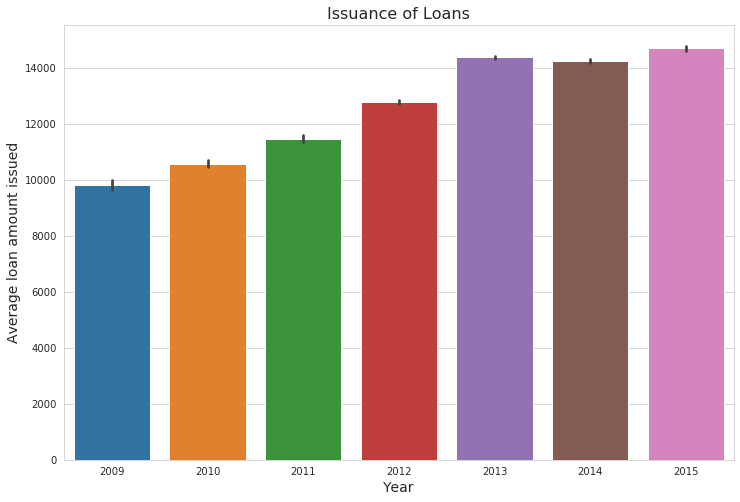

In [410]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amount', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

[Text(0, 0.5, '(%)')]

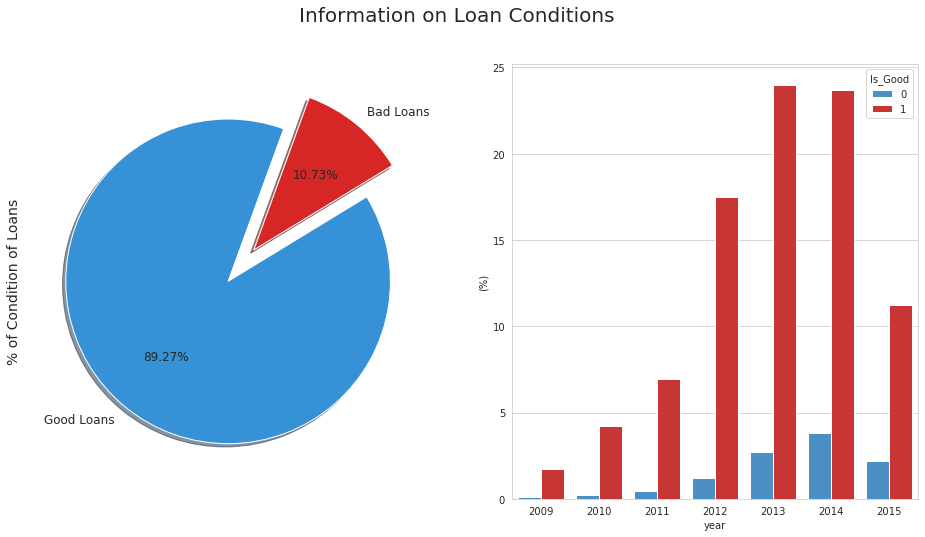

In [411]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["Is_Good"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="Is_Good", data=df, palette=palette,hue_order=[0,1], estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [412]:
region_dict = [
    {"County":"Guernsey","Region":"CrownDependencies"},
    {"County":"IOM","Region":"CrownDependencies"},
    {"County":"Jersey","Region":"CrownDependencies"},
    {"County":"NorthEastDerbyshire","Region":"EastMidlands"},
    {"County":"AmberValley","Region":"EastMidlands"},
    {"County":"Ashfield","Region":"EastMidlands"},
    {"County":"Bassetlaw","Region":"EastMidlands"},
    {"County":"Blaby","Region":"EastMidlands"},
    {"County":"Bolsover","Region":"EastMidlands"},
    {"County":"Boston","Region":"EastMidlands"},
    {"County":"Broxtowe","Region":"EastMidlands"},
    {"County":"Charnwood","Region":"EastMidlands"},
    {"County":"Chesterfield","Region":"EastMidlands"},
    {"County":"Corby","Region":"EastMidlands"},
    {"County":"Daventry","Region":"EastMidlands"},
    {"County":"Derby","Region":"EastMidlands"},
    {"County":"Derbyshire","Region":"EastMidlands"},
    {"County":"Derbyshire","Region":"EastMidlands"},
    {"County":"DerbyshireDales","Region":"EastMidlands"},
    {"County":"EastLindsey","Region":"EastMidlands"},
    {"County":"EastNorthamptonshire","Region":"EastMidlands"},
    {"County":"Erewash","Region":"EastMidlands"},
    {"County":"Gedling","Region":"EastMidlands"},
    {"County":"Harborough","Region":"EastMidlands"},
    {"County":"HighPeak","Region":"EastMidlands"},
    {"County":"HinckleyandBosworth","Region":"EastMidlands"},
    {"County":"Kettering","Region":"EastMidlands"},
    {"County":"Leicester","Region":"EastMidlands"},
    {"County":"Leicestershire","Region":"EastMidlands"},
    {"County":"Leicestershire","Region":"EastMidlands"},
    {"County":"Lincoln","Region":"EastMidlands"},
    {"County":"Lincolnshire","Region":"EastMidlands"},
    {"County":"Lincolnshire","Region":"EastMidlands"},
    {"County":"Mansfield","Region":"EastMidlands"},
    {"County":"Melton","Region":"EastMidlands"},
    {"County":"NewarkandSherwood","Region":"EastMidlands"},
    {"County":"NorthKesteven","Region":"EastMidlands"},
    {"County":"NorthWestLeicestershire","Region":"EastMidlands"},
    {"County":"Northampton","Region":"EastMidlands"},
    {"County":"Northamptonshire","Region":"EastMidlands"},
    {"County":"Nottingham","Region":"EastMidlands"},
    {"County":"Nottinghamshire","Region":"EastMidlands"},
    {"County":"Nottinghamshire","Region":"EastMidlands"},
    {"County":"OadbyandWigston","Region":"EastMidlands"},
    {"County":"Rushcliffe","Region":"EastMidlands"},
    {"County":"Rutland","Region":"EastMidlands"},
    {"County":"SouthDerbyshire","Region":"EastMidlands"},
    {"County":"SouthHolland","Region":"EastMidlands"},
    {"County":"SouthKesteven","Region":"EastMidlands"},
    {"County":"SouthNorthamptonshire","Region":"EastMidlands"},
    {"County":"Wellingborough","Region":"EastMidlands"},
    {"County":"WestLindsey","Region":"EastMidlands"},
    {"County":"Babergh","Region":"EastofEngland"},
    {"County":"Basildon","Region":"EastofEngland"},
    {"County":"Bedford","Region":"EastofEngland"},
    {"County":"BedfordBorough","Region":"EastofEngland"},
    {"County":"Bedfordshire","Region":"EastofEngland"},
    {"County":"Braintree","Region":"EastofEngland"},
    {"County":"Breckland","Region":"EastofEngland"},
    {"County":"Brentwood","Region":"EastofEngland"},
    {"County":"Broadland","Region":"EastofEngland"},
    {"County":"Broxbourne","Region":"EastofEngland"},
    {"County":"Cambridge","Region":"EastofEngland"},
    {"County":"Cambridgeshire","Region":"EastofEngland"},
    {"County":"Cambridgeshire","Region":"EastofEngland"},
    {"County":"CastlePoint","Region":"EastofEngland"},
    {"County":"CentralBedfordshire","Region":"EastofEngland"},
    {"County":"Chelmsford","Region":"EastofEngland"},
    {"County":"Colchester","Region":"EastofEngland"},
    {"County":"Dacorum","Region":"EastofEngland"},
    {"County":"EastCambridgeshire","Region":"EastofEngland"},
    {"County":"EastHertfordshire","Region":"EastofEngland"},
    {"County":"EppingForest","Region":"EastofEngland"},
    {"County":"Essex","Region":"EastofEngland"},
    {"County":"Essex","Region":"EastofEngland"},
    {"County":"Fenland","Region":"EastofEngland"},
    {"County":"ForestHeath","Region":"EastofEngland"},
    {"County":"GreatYarmouth","Region":"EastofEngland"},
    {"County":"Harlow","Region":"EastofEngland"},
    {"County":"Hertfordshire","Region":"EastofEngland"},
    {"County":"Hertsmere","Region":"EastofEngland"},
    {"County":"Huntingdonshire","Region":"EastofEngland"},
    {"County":"Ipswich","Region":"EastofEngland"},
    {"County":"King'sLynnandWestNorfolk","Region":"EastofEngland"},
    {"County":"Luton","Region":"EastofEngland"},
    {"County":"Maldon","Region":"EastofEngland"},
    {"County":"MidSuffolk","Region":"EastofEngland"},
    {"County":"Norfolk","Region":"EastofEngland"},
    {"County":"NorthHertfordshire","Region":"EastofEngland"},
    {"County":"NorthNorfolk","Region":"EastofEngland"},
    {"County":"Norwich","Region":"EastofEngland"},
    {"County":"Peterborough","Region":"EastofEngland"},
    {"County":"Rochford","Region":"EastofEngland"},
    {"County":"SouthCambridgeshire","Region":"EastofEngland"},
    {"County":"SouthNorfolk","Region":"EastofEngland"},
    {"County":"Southend-on-Sea","Region":"EastofEngland"},
    {"County":"StAlbans","Region":"EastofEngland"},
    {"County":"St.Edmundsbury","Region":"EastofEngland"},
    {"County":"Stevenage","Region":"EastofEngland"},
    {"County":"Suffolk","Region":"EastofEngland"},
    {"County":"SuffolkCoastal","Region":"EastofEngland"},
    {"County":"Tendring","Region":"EastofEngland"},
    {"County":"ThreeRivers","Region":"EastofEngland"},
    {"County":"Thurrock","Region":"EastofEngland"},
    {"County":"Uttlesford","Region":"EastofEngland"},
    {"County":"Watford","Region":"EastofEngland"},
    {"County":"Waveney","Region":"EastofEngland"},
    {"County":"WelwynHatfield","Region":"EastofEngland"},
    {"County":"BarkingandDagenham","Region":"London"},
    {"County":"Barnet","Region":"London"},
    {"County":"Bexley","Region":"London"},
    {"County":"Brent","Region":"London"},
    {"County":"Bromley","Region":"London"},
    {"County":"Camden","Region":"London"},
    {"County":"CityofLondon","Region":"London"},
    {"County":"CityofLondon","Region":"London"},
    {"County":"CityofWestminster","Region":"London"},
    {"County":"Croydon","Region":"London"},
    {"County":"Ealing","Region":"London"},
    {"County":"Enfield","Region":"London"},
    {"County":"GreaterLondon","Region":"London"},
    {"County":"Greenwich","Region":"London"},
    {"County":"Hackney","Region":"London"},
    {"County":"HammersmithandFulham","Region":"London"},
    {"County":"Haringey","Region":"London"},
    {"County":"Harrow","Region":"London"},
    {"County":"Havering","Region":"London"},
    {"County":"Hillingdon","Region":"London"},
    {"County":"Hounslow","Region":"London"},
    {"County":"Islington","Region":"London"},
    {"County":"KensingtonandChelsea","Region":"London"},
    {"County":"KingstonuponThames","Region":"London"},
    {"County":"Lambeth","Region":"London"},
    {"County":"Lewisham","Region":"London"},
    {"County":"Merton","Region":"London"},
    {"County":"Newham","Region":"London"},
    {"County":"Redbridge","Region":"London"},
    {"County":"Richmond","Region":"London"},
    {"County":"Southwark","Region":"London"},
    {"County":"Sutton","Region":"London"},
    {"County":"TowerHamlets","Region":"London"},
    {"County":"WalthamForest","Region":"London"},
    {"County":"Wandsworth","Region":"London"},
    {"County":"Westminster","Region":"London"},
    {"County":"CountyDurham","Region":"NorthEastEngland"},
    {"County":"Darlington","Region":"NorthEastEngland"},
    {"County":"Durham","Region":"NorthEastEngland"},
    {"County":"Durham","Region":"NorthEastEngland"},
    {"County":"Gateshead","Region":"NorthEastEngland"},
    {"County":"Hartlepool","Region":"NorthEastEngland"},
    {"County":"Middlesbrough","Region":"NorthEastEngland"},
    {"County":"NewcastleUponTyne","Region":"NorthEastEngland"},
    {"County":"NorthTyneside","Region":"NorthEastEngland"},
    {"County":"NorthYorkshire","Region":"NorthEastEngland"},
    {"County":"Northumberland","Region":"NorthEastEngland"},
    {"County":"RedcarandCleveland","Region":"NorthEastEngland"},
    {"County":"SouthTyneside","Region":"NorthEastEngland"},
    {"County":"Stockton-on-Tees","Region":"NorthEastEngland"},
    {"County":"Sunderland","Region":"NorthEastEngland"},
    {"County":"TyneandWear","Region":"NorthEastEngland"},
    {"County":"Allerdale","Region":"NorthWestEngland"},
    {"County":"Barrow-in-Furness","Region":"NorthWestEngland"},
    {"County":"BlackburnwithDarwen","Region":"NorthWestEngland"},
    {"County":"Blackpool","Region":"NorthWestEngland"},
    {"County":"Bolton","Region":"NorthWestEngland"},
    {"County":"Burnley","Region":"NorthWestEngland"},
    {"County":"Bury","Region":"NorthWestEngland"},
    {"County":"Carlisle","Region":"NorthWestEngland"},
    {"County":"Cheshire","Region":"NorthWestEngland"},
    {"County":"CheshireEast","Region":"NorthWestEngland"},
    {"County":"CheshireWestandChester","Region":"NorthWestEngland"},
    {"County":"Chorley","Region":"NorthWestEngland"},
    {"County":"Copeland","Region":"NorthWestEngland"},
    {"County":"Cumbria","Region":"NorthWestEngland"},
    {"County":"Eden","Region":"NorthWestEngland"},
    {"County":"Fylde","Region":"NorthWestEngland"},
    {"County":"GreaterManchester","Region":"NorthWestEngland"},
    {"County":"Halton","Region":"NorthWestEngland"},
    {"County":"Hyndburn","Region":"NorthWestEngland"},
    {"County":"Knowsley","Region":"NorthWestEngland"},
    {"County":"Lancashire","Region":"NorthWestEngland"},
    {"County":"Lancashire","Region":"NorthWestEngland"},
    {"County":"Lancaster","Region":"NorthWestEngland"},
    {"County":"Liverpool","Region":"NorthWestEngland"},
    {"County":"Manchester","Region":"NorthWestEngland"},
    {"County":"Merseyside","Region":"NorthWestEngland"},
    {"County":"Oldham","Region":"NorthWestEngland"},
    {"County":"Pendle","Region":"NorthWestEngland"},
    {"County":"Preston","Region":"NorthWestEngland"},
    {"County":"RibbleValley","Region":"NorthWestEngland"},
    {"County":"Rochdale","Region":"NorthWestEngland"},
    {"County":"Rossendale","Region":"NorthWestEngland"},
    {"County":"Salford","Region":"NorthWestEngland"},
    {"County":"Sefton","Region":"NorthWestEngland"},
    {"County":"SouthLakeland","Region":"NorthWestEngland"},
    {"County":"SouthRibble","Region":"NorthWestEngland"},
    {"County":"StHelens","Region":"NorthWestEngland"},
    {"County":"St.Helens","Region":"NorthWestEngland"},
    {"County":"Stockport","Region":"NorthWestEngland"},
    {"County":"Tameside","Region":"NorthWestEngland"},
    {"County":"Trafford","Region":"NorthWestEngland"},
    {"County":"Warrington","Region":"NorthWestEngland"},
    {"County":"WestLancashire","Region":"NorthWestEngland"},
    {"County":"Wigan","Region":"NorthWestEngland"},
    {"County":"Wirral","Region":"NorthWestEngland"},
    {"County":"Wyre","Region":"NorthWestEngland"},
    {"County":"Antrim","Region":"NorthernIreland"},
    {"County":"Ards","Region":"NorthernIreland"},
    {"County":"Armagh","Region":"NorthernIreland"},
    {"County":"Ballymena","Region":"NorthernIreland"},
    {"County":"Ballymoney","Region":"NorthernIreland"},
    {"County":"Banbridge","Region":"NorthernIreland"},
    {"County":"Belfast","Region":"NorthernIreland"},
    {"County":"Carrickfergus","Region":"NorthernIreland"},
    {"County":"Castlereagh","Region":"NorthernIreland"},
    {"County":"Coleraine","Region":"NorthernIreland"},
    {"County":"Cookstown","Region":"NorthernIreland"},
    {"County":"CountyArmagh","Region":"NorthernIreland"},
    {"County":"CountyFermanagh","Region":"NorthernIreland"},
    {"County":"Craigavon","Region":"NorthernIreland"},
    {"County":"Derry","Region":"NorthernIreland"},
    {"County":"Down","Region":"NorthernIreland"},
    {"County":"Dungannon","Region":"NorthernIreland"},
    {"County":"Fermanagh","Region":"NorthernIreland"},
    {"County":"Larne","Region":"NorthernIreland"},
    {"County":"Limavady","Region":"NorthernIreland"},
    {"County":"Lisburn","Region":"NorthernIreland"},
    {"County":"Magherafelt","Region":"NorthernIreland"},
    {"County":"Moyle","Region":"NorthernIreland"},
    {"County":"NewryandMourne","Region":"NorthernIreland"},
    {"County":"NewryandMourne","Region":"NorthernIreland"},
    {"County":"Newtownabbey","Region":"NorthernIreland"},
    {"County":"NorthDown","Region":"NorthernIreland"},
    {"County":"Omagh","Region":"NorthernIreland"},
    {"County":"SouthTyrone","Region":"NorthernIreland"},
    {"County":"Strabane","Region":"NorthernIreland"},
    {"County":"AberdeenCity","Region":"Scotland"},
    {"County":"Aberdeenshire","Region":"Scotland"},
    {"County":"Angus","Region":"Scotland"},
    {"County":"ArgyllandBute","Region":"Scotland"},
    {"County":"Argyllshire","Region":"Scotland"},
    {"County":"Ayrshire","Region":"Scotland"},
    {"County":"Banffshire","Region":"Scotland"},
    {"County":"Berwickshire","Region":"Scotland"},
    {"County":"Bute","Region":"Scotland"},
    {"County":"Caithness","Region":"Scotland"},
    {"County":"CityofEdinburgh","Region":"Scotland"},
    {"County":"Clackmannanshire","Region":"Scotland"},
    {"County":"DumfriesandGalloway","Region":"Scotland"},
    {"County":"Dumfriesshire","Region":"Scotland"},
    {"County":"Dunbartonshire","Region":"Scotland"},
    {"County":"DundeeCity","Region":"Scotland"},
    {"County":"EastAyrshire","Region":"Scotland"},
    {"County":"EastDunbartonshire","Region":"Scotland"},
    {"County":"EastLothian","Region":"Scotland"},
    {"County":"EastRenfrewshire","Region":"Scotland"},
    {"County":"EdinburghCity","Region":"Scotland"},
    {"County":"EileanSiar","Region":"Scotland"},
    {"County":"Falkirk","Region":"Scotland"},
    {"County":"Fife","Region":"Scotland"},
    {"County":"GlasgowCity","Region":"Scotland"},
    {"County":"Highland","Region":"Scotland"},
    {"County":"Inverclyde","Region":"Scotland"},
    {"County":"Inverness-shire","Region":"Scotland"},
    {"County":"Kincardineshire","Region":"Scotland"},
    {"County":"Kinross-shire","Region":"Scotland"},
    {"County":"Kirkcudbrightshire","Region":"Scotland"},
    {"County":"Lanarkshire","Region":"Scotland"},
    {"County":"Midlothian","Region":"Scotland"},
    {"County":"Moray","Region":"Scotland"},
    {"County":"Nairnshire","Region":"Scotland"},
    {"County":"NorthAyrshire","Region":"Scotland"},
    {"County":"NorthLanarkshire","Region":"Scotland"},
    {"County":"Orkney","Region":"Scotland"},
    {"County":"OrkneyIslands","Region":"Scotland"},
    {"County":"Peeblesshire","Region":"Scotland"},
    {"County":"PerthandKinross","Region":"Scotland"},
    {"County":"Perthshire","Region":"Scotland"},
    {"County":"Renfrewshire","Region":"Scotland"},
    {"County":"RossandCromarty","Region":"Scotland"},
    {"County":"Roxburghshire","Region":"Scotland"},
    {"County":"Selkirkshire","Region":"Scotland"},
    {"County":"ShetlandIslands","Region":"Scotland"},
    {"County":"SouthAyrshire","Region":"Scotland"},
    {"County":"SouthLanarkshire","Region":"Scotland"},
    {"County":"SouthLanarkshire","Region":"Scotland"},
    {"County":"Stirling","Region":"Scotland"},
    {"County":"Stirlingshire","Region":"Scotland"},
    {"County":"Sutherland","Region":"Scotland"},
    {"County":"TheScottishBorders","Region":"Scotland"},
    {"County":"WestAyrshire","Region":"Scotland"},
    {"County":"WestDunbartonshire","Region":"Scotland"},
    {"County":"WestLothian","Region":"Scotland"},
    {"County":"Wigtownshire","Region":"Scotland"},
    {"County":"Zetland","Region":"Scotland"},
    {"County":"Adur","Region":"SouthEastEngland"},
    {"County":"Arun","Region":"SouthEastEngland"},
    {"County":"Ashford","Region":"SouthEastEngland"},
    {"County":"AylesburyVale","Region":"SouthEastEngland"},
    {"County":"BasingstokeandDeane","Region":"SouthEastEngland"},
    {"County":"Berkshire","Region":"SouthEastEngland"},
    {"County":"BracknellForest","Region":"SouthEastEngland"},
    {"County":"BrightonandHove","Region":"SouthEastEngland"},
    {"County":"Buckinghamshire","Region":"SouthEastEngland"},
    {"County":"Buckinghamshire","Region":"SouthEastEngland"},
    {"County":"Canterbury","Region":"SouthEastEngland"},
    {"County":"Cherwell","Region":"SouthEastEngland"},
    {"County":"Chichester","Region":"SouthEastEngland"},
    {"County":"Chiltern","Region":"SouthEastEngland"},
    {"County":"Crawley","Region":"SouthEastEngland"},
    {"County":"Dartford","Region":"SouthEastEngland"},
    {"County":"Dover","Region":"SouthEastEngland"},
    {"County":"EastHampshire","Region":"SouthEastEngland"},
    {"County":"EastSussex","Region":"SouthEastEngland"},
    {"County":"EastSussex","Region":"SouthEastEngland"},
    {"County":"Eastbourne","Region":"SouthEastEngland"},
    {"County":"Eastleigh","Region":"SouthEastEngland"},
    {"County":"Elmbridge","Region":"SouthEastEngland"},
    {"County":"EpsomandEwell","Region":"SouthEastEngland"},
    {"County":"Fareham","Region":"SouthEastEngland"},
    {"County":"Gosport","Region":"SouthEastEngland"},
    {"County":"Gravesham","Region":"SouthEastEngland"},
    {"County":"Guildford","Region":"SouthEastEngland"},
    {"County":"Hampshire","Region":"SouthEastEngland"},
    {"County":"Hampshire","Region":"SouthEastEngland"},
    {"County":"Hart","Region":"SouthEastEngland"},
    {"County":"Hastings","Region":"SouthEastEngland"},
    {"County":"Havant","Region":"SouthEastEngland"},
    {"County":"Horsham","Region":"SouthEastEngland"},
    {"County":"IsleofWight","Region":"SouthEastEngland"},
    {"County":"Kent","Region":"SouthEastEngland"},
    {"County":"Kent","Region":"SouthEastEngland"},
    {"County":"Lewes","Region":"SouthEastEngland"},
    {"County":"Maidstone","Region":"SouthEastEngland"},
    {"County":"Medway","Region":"SouthEastEngland"},
    {"County":"MidSussex","Region":"SouthEastEngland"},
    {"County":"MiltonKeynes","Region":"SouthEastEngland"},
    {"County":"MoleValley","Region":"SouthEastEngland"},
    {"County":"NewForest","Region":"SouthEastEngland"},
    {"County":"Oxford","Region":"SouthEastEngland"},
    {"County":"Oxfordshire","Region":"SouthEastEngland"},
    {"County":"Portsmouth","Region":"SouthEastEngland"},
    {"County":"Reading","Region":"SouthEastEngland"},
    {"County":"ReigateandBanstead","Region":"SouthEastEngland"},
    {"County":"Rother","Region":"SouthEastEngland"},
    {"County":"Runnymede","Region":"SouthEastEngland"},
    {"County":"Rushmoor","Region":"SouthEastEngland"},
    {"County":"Sevenoaks","Region":"SouthEastEngland"},
    {"County":"Shepway","Region":"SouthEastEngland"},
    {"County":"Slough","Region":"SouthEastEngland"},
    {"County":"SouthBucks","Region":"SouthEastEngland"},
    {"County":"SouthOxfordshire","Region":"SouthEastEngland"},
    {"County":"Southampton","Region":"SouthEastEngland"},
    {"County":"Spelthorne","Region":"SouthEastEngland"},
    {"County":"Surrey","Region":"SouthEastEngland"},
    {"County":"SurreyHeath","Region":"SouthEastEngland"},
    {"County":"Swale","Region":"SouthEastEngland"},
    {"County":"Tandridge","Region":"SouthEastEngland"},
    {"County":"TestValley","Region":"SouthEastEngland"},
    {"County":"Thanet","Region":"SouthEastEngland"},
    {"County":"TonbridgeandMalling","Region":"SouthEastEngland"},
    {"County":"TunbridgeWells","Region":"SouthEastEngland"},
    {"County":"ValeofWhiteHorse","Region":"SouthEastEngland"},
    {"County":"Waverley","Region":"SouthEastEngland"},
    {"County":"Wealden","Region":"SouthEastEngland"},
    {"County":"WestBerkshire","Region":"SouthEastEngland"},
    {"County":"WestOxfordshire","Region":"SouthEastEngland"},
    {"County":"WestSussex","Region":"SouthEastEngland"},
    {"County":"Winchester","Region":"SouthEastEngland"},
    {"County":"WindsorandMaidenhead","Region":"SouthEastEngland"},
    {"County":"Woking","Region":"SouthEastEngland"},
    {"County":"Wokingham","Region":"SouthEastEngland"},
    {"County":"Worthing","Region":"SouthEastEngland"},
    {"County":"Wycombe","Region":"SouthEastEngland"},
    {"County":"BathandNorthEastSomerset","Region":"SouthWestEngland"},
    {"County":"Bournemouth","Region":"SouthWestEngland"},
    {"County":"Bristol","Region":"SouthWestEngland"},
    {"County":"Cheltenham","Region":"SouthWestEngland"},
    {"County":"Christchurch","Region":"SouthWestEngland"},
    {"County":"CityofBristol","Region":"SouthWestEngland"},
    {"County":"Cornwall","Region":"SouthWestEngland"},
    {"County":"Cornwall","Region":"SouthWestEngland"},
    {"County":"Cotswold","Region":"SouthWestEngland"},
    {"County":"Devon","Region":"SouthWestEngland"},
    {"County":"Devon","Region":"SouthWestEngland"},
    {"County":"Dorset","Region":"SouthWestEngland"},
    {"County":"Dorset","Region":"SouthWestEngland"},
    {"County":"EastDevon","Region":"SouthWestEngland"},
    {"County":"EastDorset","Region":"SouthWestEngland"},
    {"County":"Exeter","Region":"SouthWestEngland"},
    {"County":"ForestofDean","Region":"SouthWestEngland"},
    {"County":"Gloucester","Region":"SouthWestEngland"},
    {"County":"Gloucestershire","Region":"SouthWestEngland"},
    {"County":"Gloucestershire","Region":"SouthWestEngland"},
    {"County":"IslesofScilly","Region":"SouthWestEngland"},
    {"County":"Mendip","Region":"SouthWestEngland"},
    {"County":"MidDevon","Region":"SouthWestEngland"},
    {"County":"NorthDevon","Region":"SouthWestEngland"},
    {"County":"NorthDorset","Region":"SouthWestEngland"},
    {"County":"NorthSomerset","Region":"SouthWestEngland"},
    {"County":"Plymouth","Region":"SouthWestEngland"},
    {"County":"Poole","Region":"SouthWestEngland"},
    {"County":"Purbeck","Region":"SouthWestEngland"},
    {"County":"Sedgemoor","Region":"SouthWestEngland"},
    {"County":"Somerset","Region":"SouthWestEngland"},
    {"County":"Somerset","Region":"SouthWestEngland"},
    {"County":"SouthGloucestershire","Region":"SouthWestEngland"},
    {"County":"SouthHams","Region":"SouthWestEngland"},
    {"County":"SouthSomerset","Region":"SouthWestEngland"},
    {"County":"Stroud","Region":"SouthWestEngland"},
    {"County":"Swindon","Region":"SouthWestEngland"},
    {"County":"TauntonDeane","Region":"SouthWestEngland"},
    {"County":"Teignbridge","Region":"SouthWestEngland"},
    {"County":"Tewkesbury","Region":"SouthWestEngland"},
    {"County":"Torbay","Region":"SouthWestEngland"},
    {"County":"Torridge","Region":"SouthWestEngland"},
    {"County":"WestDevon","Region":"SouthWestEngland"},
    {"County":"WestDorset","Region":"SouthWestEngland"},
    {"County":"WestSomerset","Region":"SouthWestEngland"},
    {"County":"WeymouthandPortland","Region":"SouthWestEngland"},
    {"County":"Wiltshire","Region":"SouthWestEngland"},
    {"County":"Wiltshire","Region":"SouthWestEngland"},
    {"County":"Aberdare","Region":"Wales"},
    {"County":"Bargoed","Region":"Wales"},
    {"County":"Barry","Region":"Wales"},
    {"County":"BlaenauGwent","Region":"Wales"},
    {"County":"Bridgend","Region":"Wales"},
    {"County":"Caerphilly","Region":"Wales"},
    {"County":"Cardiff","Region":"Wales"},
    {"County":"Carmarthenshire","Region":"Wales"},
    {"County":"Ceredigion","Region":"Wales"},
    {"County":"Conwy","Region":"Wales"},
    {"County":"Cowbridge","Region":"Wales"},
    {"County":"Denbighshire","Region":"Wales"},
    {"County":"DinasPowys","Region":"Wales"},
    {"County":"Ferndale","Region":"Wales"},
    {"County":"Flintshire","Region":"Wales"},
    {"County":"Gwynedd","Region":"Wales"},
    {"County":"Hengoed","Region":"Wales"},
    {"County":"IsleofAnglesey","Region":"Wales"},
    {"County":"LlantwitMajor","Region":"Wales"},
    {"County":"Maesteg","Region":"Wales"},
    {"County":"MerthyrTydfil","Region":"Wales"},
    {"County":"Monmouthshire","Region":"Wales"},
    {"County":"Monmouthshire","Region":"Wales"},
    {"County":"MountainAsh","Region":"Wales"},
    {"County":"NeathPortTalbot","Region":"Wales"},
    {"County":"Newport","Region":"Wales"},
    {"County":"Newport","Region":"Wales"},
    {"County":"Pembrokeshire","Region":"Wales"},
    {"County":"Penarth","Region":"Wales"},
    {"County":"Pentre","Region":"Wales"},
    {"County":"Pontyclun","Region":"Wales"},
    {"County":"Pontypridd","Region":"Wales"},
    {"County":"Porth","Region":"Wales"},
    {"County":"Porthcawl","Region":"Wales"},
    {"County":"Powys","Region":"Wales"},
    {"County":"RhonddaCynonTaff","Region":"Wales"},
    {"County":"Rhoose","Region":"Wales"},
    {"County":"Sully","Region":"Wales"},
    {"County":"Swansea","Region":"Wales"},
    {"County":"TheValeofGlamorgan","Region":"Wales"},
    {"County":"Tonypandy","Region":"Wales"},
    {"County":"Torfaen","Region":"Wales"},
    {"County":"Treharris","Region":"Wales"},
    {"County":"Treorchy","Region":"Wales"},
    {"County":"Wrexham","Region":"Wales"},
    {"County":"Birmingham","Region":"WestMidlands"},
    {"County":"Bromsgrove","Region":"WestMidlands"},
    {"County":"CannockChase","Region":"WestMidlands"},
    {"County":"Coventry","Region":"WestMidlands"},
    {"County":"Dudley","Region":"WestMidlands"},
    {"County":"EastStaffordshire","Region":"WestMidlands"},
    {"County":"Herefordshire","Region":"WestMidlands"},
    {"County":"Lichfield","Region":"WestMidlands"},
    {"County":"MalvernHills","Region":"WestMidlands"},
    {"County":"Newcastle-under-Lyme","Region":"WestMidlands"},
    {"County":"NorthWarwickshire","Region":"WestMidlands"},
    {"County":"NuneatonandBedworth","Region":"WestMidlands"},
    {"County":"Redditch","Region":"WestMidlands"},
    {"County":"Rugby","Region":"WestMidlands"},
    {"County":"Sandwell","Region":"WestMidlands"},
    {"County":"Shropshire","Region":"WestMidlands"},
    {"County":"Shropshire","Region":"WestMidlands"},
    {"County":"Solihull","Region":"WestMidlands"},
    {"County":"SouthStaffordshire","Region":"WestMidlands"},
    {"County":"Stafford","Region":"WestMidlands"},
    {"County":"Staffordshire","Region":"WestMidlands"},
    {"County":"Staffordshire","Region":"WestMidlands"},
    {"County":"StaffordshireMoorlands","Region":"WestMidlands"},
    {"County":"Stoke-on-Trent","Region":"WestMidlands"},
    {"County":"Stratford-on-Avon","Region":"WestMidlands"},
    {"County":"Tamworth","Region":"WestMidlands"},
    {"County":"TelfordandWrekin","Region":"WestMidlands"},
    {"County":"Walsall","Region":"WestMidlands"},
    {"County":"Warwick","Region":"WestMidlands"},
    {"County":"Warwickshire","Region":"WestMidlands"},
    {"County":"WestMidlands","Region":"WestMidlands"},
    {"County":"Wolverhampton","Region":"WestMidlands"},
    {"County":"Worcester","Region":"WestMidlands"},
    {"County":"Worcestershire","Region":"WestMidlands"},
    {"County":"Wychavon","Region":"WestMidlands"},
    {"County":"WyreForest","Region":"WestMidlands"},
    {"County":"Barnsley","Region":"YorkshireandtheHumber"},
    {"County":"Bradford","Region":"YorkshireandtheHumber"},
    {"County":"Calderdale","Region":"YorkshireandtheHumber"},
    {"County":"CityofKingston-upon-Hull","Region":"YorkshireandtheHumber"},
    {"County":"Craven","Region":"YorkshireandtheHumber"},
    {"County":"Doncaster","Region":"YorkshireandtheHumber"},
    {"County":"EastRidingofYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"EastRidingofYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Hambleton","Region":"YorkshireandtheHumber"},
    {"County":"Harrogate","Region":"YorkshireandtheHumber"},
    {"County":"KingstonuponHull","Region":"YorkshireandtheHumber"},
    {"County":"Kirklees","Region":"YorkshireandtheHumber"},
    {"County":"Leeds","Region":"YorkshireandtheHumber"},
    {"County":"Lincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthEastLincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthLincolnshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"NorthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Richmondshire","Region":"YorkshireandtheHumber"},
    {"County":"Rotherham","Region":"YorkshireandtheHumber"},
    {"County":"Ryedale","Region":"YorkshireandtheHumber"},
    {"County":"Scarborough","Region":"YorkshireandtheHumber"},
    {"County":"Selby","Region":"YorkshireandtheHumber"},
    {"County":"Sheffield","Region":"YorkshireandtheHumber"},
    {"County":"SouthYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"Wakefield","Region":"YorkshireandtheHumber"},
    {"County":"WestYorkshire","Region":"YorkshireandtheHumber"},
    {"County":"York","Region":"YorkshireandtheHumber"}
]

regions_df = pd.DataFrame.from_dict(region_dict, orient='columns')
df = pd.merge(df,regions_df,how='inner', left_on='district', right_on='County')
df.head()

,installment,loan_amount,interest_rate,term,purpose,issue_date,description,home_ownership,annual_income,employment_length,job_title,earliest_credit_line,public_records,last_record_months,last_delinquency_months,last_derog_months,delinquency_2y,inquiries_6m,open_accounts,debt_to_income,credit_card_usage,credit_card_balance,total_current_balance,nr_accounts,loan_status,amount_payed,year,district,credit_score,Is_Good,County,Region
0,829.10,25000.0,11.89,36 months,debt_consolidation,Aug-2009,Due to a lack of personal finance education an...,RENT,85000.0,< 1 year,NaN,Feb-1994,0.0,NaN,NaN,NaN,0.0,0.0,10.0,19.48,52.1,28854.0,NaN,42.0,Fully Paid,29324.32,2009,Liverpool,710.699725,1,Liverpool,NorthWestEngland
1,431.14,13000.0,11.89,36 months,debt_consolidation,Feb-2009,I have two credit cards currently one with a a...,MORTGAGE,56030.0,10+ years,Mississippi Department of Employment Security,Apr-1995,0.0,NaN,NaN,NaN,0.0,0.0,7.0,20.11,64.4,12755.0,NaN,20.0,Fully Paid,15263.54,2009,Liverpool,625.449284,1,Liverpool,NorthWestEngland
2,182.23,5300.0,14.42,36 months,educational,Feb-2009,Repayment to University of Hartford for purpo...,RENT,50004.0,5 years,BDO Seidman LLP,Aug-2001,0.0,NaN,53.0,NaN,0.0,0.0,6.0,15.24,57.2,2401.0,NaN,10.0,Fully Paid,6664.02,2009,Liverpool,565.238782,1,Liverpool,NorthWestEngland
3,385.14,12000.0,9.63,36 months,credit_card,Mar-2009,My wife and I currently have a personal loan p...,RENT,204000.0,< 1 year,Model N Inc,May-1998,0.0,NaN,NaN,NaN,0.0,0.0,20.0,9.14,29.1,25814.0,NaN,36.0,Fully Paid,13833.05,2009,Liverpool,501.976471,1,Liverpool,NorthWestEngland
4,629.81,17600.0,17.26,36 months,debt_consolidation,May-2009,After several years of slowly gaining more deb...,RENT,71480.0,8 years,East China Public Schools,Mar-1996,0.0,NaN,3.0,NaN,2.0,0.0,9.0,11.65,88.6,27914.0,NaN,19.0,Fully Paid,22666.83,2009,Liverpool,681.526592,1,Liverpool,NorthWestEngland


Text(0.5, 1.0, 'Loans issued by Region')

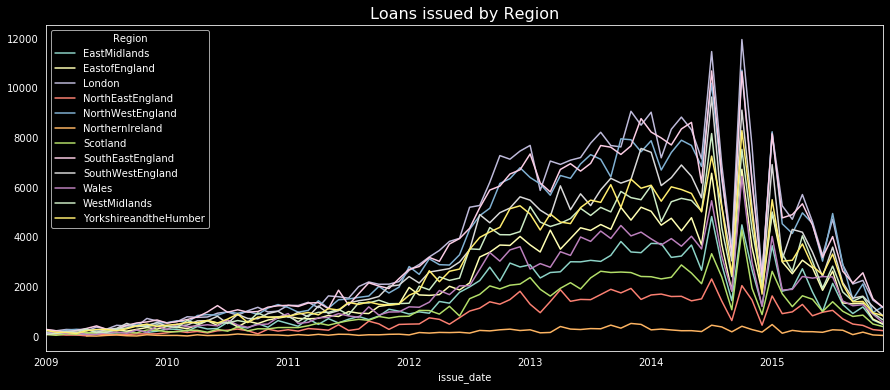

In [414]:
# This code will take the current date and transform it into a year-month format
df['complete_date'] = pd.to_datetime(df['issue_date'])

group_dates = df.groupby(['complete_date', 'Region'], as_index=False).sum()

group_dates['issue_date'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_date', 'Region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_date', 'Region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_date','Region','loan_amount']])

plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_date', 'Region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)


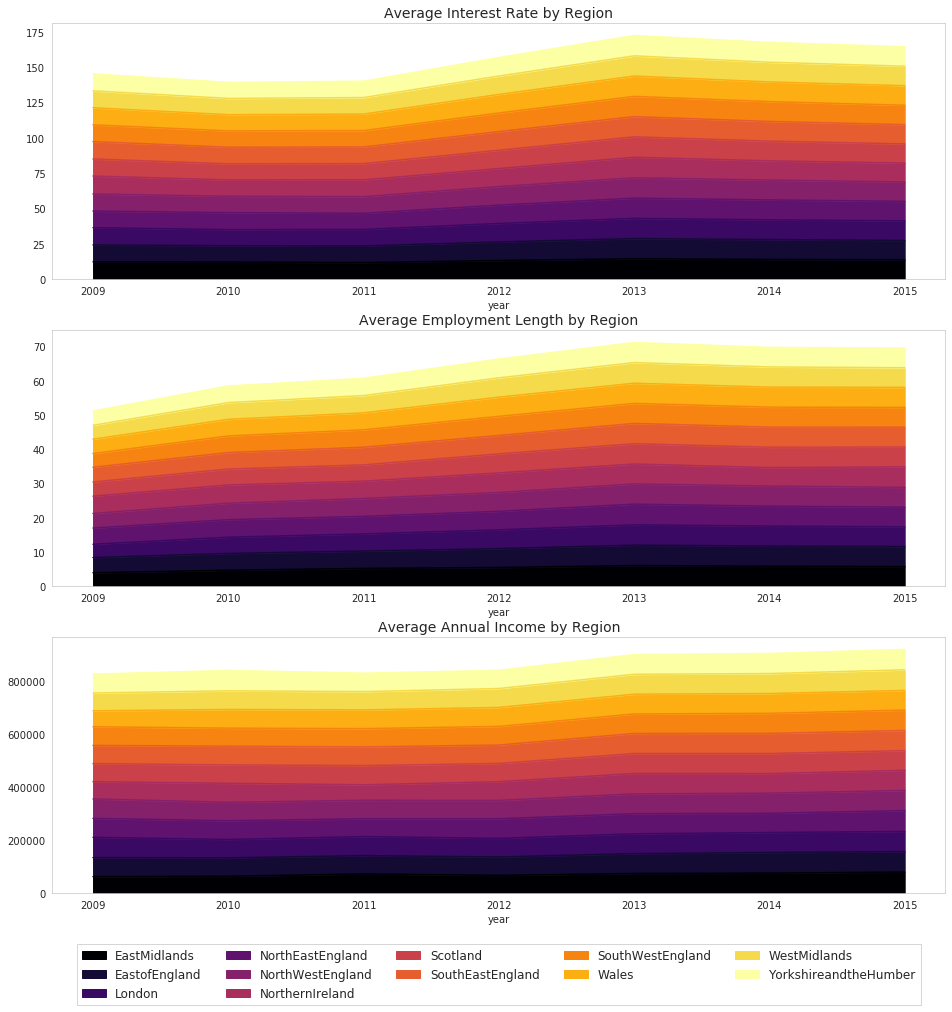

In [415]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', '0']
df['employment_length'].fillna('0', inplace=True)


lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['employment_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['employment_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['employment_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['employment_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['employment_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['employment_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['employment_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['employment_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['employment_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['employment_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['employment_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['employment_length'] == '0', "emp_length_int"] = 0
    
   
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, (ax1, ax2 ,ax3)= plt.subplots(3, 1)


cmap = plt.cm.inferno

by_interest_rate = df.groupby(['year', 'Region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,16))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'Region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,16))
ax2.set_title('Average Employment Length by Region', fontsize=14)

df['annual_income'] = df['annual_income'].str.replace('GBP', '')
df['annual_income']= df.annual_income.astype('float32')
by_income = df.groupby(['year', 'Region']).annual_income.mean()
by_income.unstack().plot(kind='area', colormap=cmap, grid=False, ax=ax3, figsize=(16,16))
ax3.set_title('Average Annual Income by Region', fontsize=14)
ax3.legend(prop={'size':12},loc='upper center', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False,  borderaxespad=0., ncol=5)


In [416]:

badloans_df = df.loc[df["Is_Good"] == 0]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['Region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['Region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['Late (> 90 days)'] = loan_status_cross['Late (> 90 days)'].apply(lambda x: round(x, 2))

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 

charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
long_pay = loan_status_cross['Late (> 90 days)'] .values.tolist()



charged = go.Bar(
    x=['NorthWestEngland', 'London', 'WestMidlands', 'Wales',
       'SouthWestEngland', 'SouthEastEngland', 'YorkshireandtheHumber',
       'EastMidlands', 'EastofEngland', 'Scotland', 'NorthEastEngland',
       'NorthernIreland'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['NorthWestEngland', 'London', 'WestMidlands', 'Wales',
       'SouthWestEngland', 'SouthEastEngland', 'YorkshireandtheHumber',
       'EastMidlands', 'EastofEngland', 'Scotland', 'NorthEastEngland',
       'NorthernIreland'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

long_pays = go.Bar(
    x=['NorthWestEngland', 'London', 'WestMidlands', 'Wales',
       'SouthWestEngland', 'SouthEastEngland', 'YorkshireandtheHumber',
       'EastMidlands', 'EastofEngland', 'Scotland', 'NorthEastEngland',
       'NorthernIreland'],
    y= long_pay,
    name='Late (> 90 days)',
    marker = dict(
        color = 'rgb(238, 76, 73)'
        ),
    text = '%'
)




data = [charged, defaults,  long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='UK Regions')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

(0, 400000)

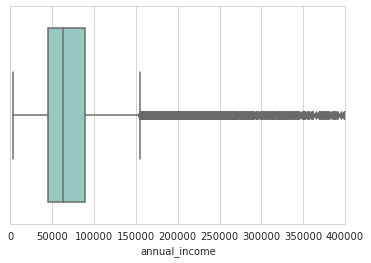

In [417]:
sns.boxplot(df['annual_income'])
plt.xlim((0, 400000)) 


The most recent data from HMRC shows that the median average pre-tax income is around £22,400. An income of over £70,000 a year will actually put you in the top five per cent of all UK earners.

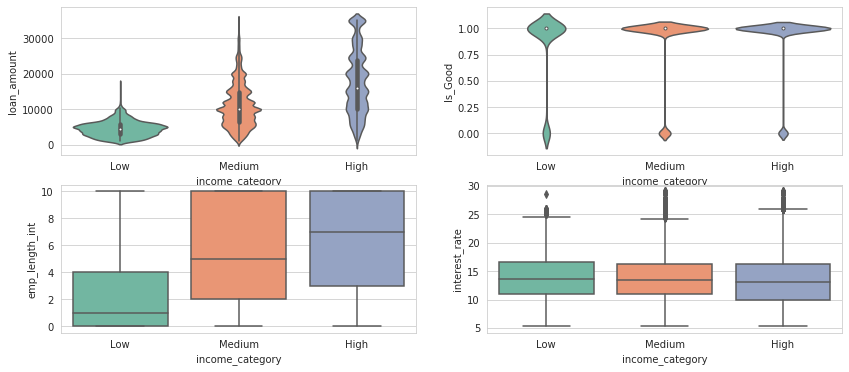

In [418]:
df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 22400, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 22400) & (col['annual_income'] <= 70000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 70000, 'income_category'] = 'High'

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

sns.violinplot(x="income_category", y="loan_amount",order=['Low','Medium','High'], data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="Is_Good",order=['Low','Medium','High'], data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int",order=['Low','Medium','High'], data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="interest_rate",order=['Low','Medium','High'], data=df, palette="Set2", ax=ax4)

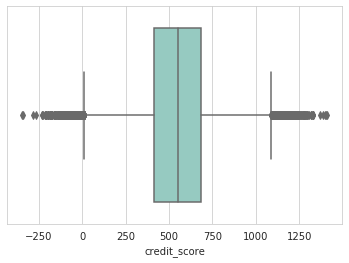

In [419]:
sns.boxplot(df['credit_score'])

Score	Band
0-560	Very Poor
561-720	Poor
721-880	Fair
881-960	Good
961-999	Excellent

xperian average credit score
The maximum Experian credit score is 999 and the average score among its customers is 759 - which is rated as a ‘fair’ credit score. 

In [420]:
df['grade'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['credit_score'] <=560, 'grade'] = 'E'
    col.loc[(col['credit_score'] > 560) & (col['credit_score'] <= 720), 'grade'] = 'D'
    col.loc[(col['credit_score'] > 720) & (col['credit_score'] <= 880), 'grade'] = 'C'
    col.loc[(col['credit_score'] > 880) & (col['credit_score'] <= 960), 'grade'] = 'B'
    col.loc[col['credit_score'] > 960, 'grade'] = 'A'


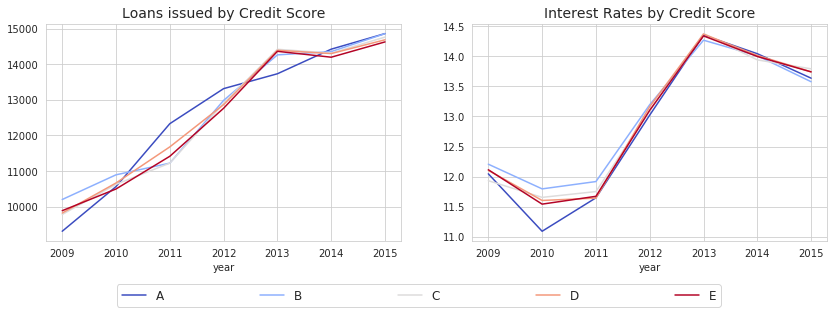

In [421]:

f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

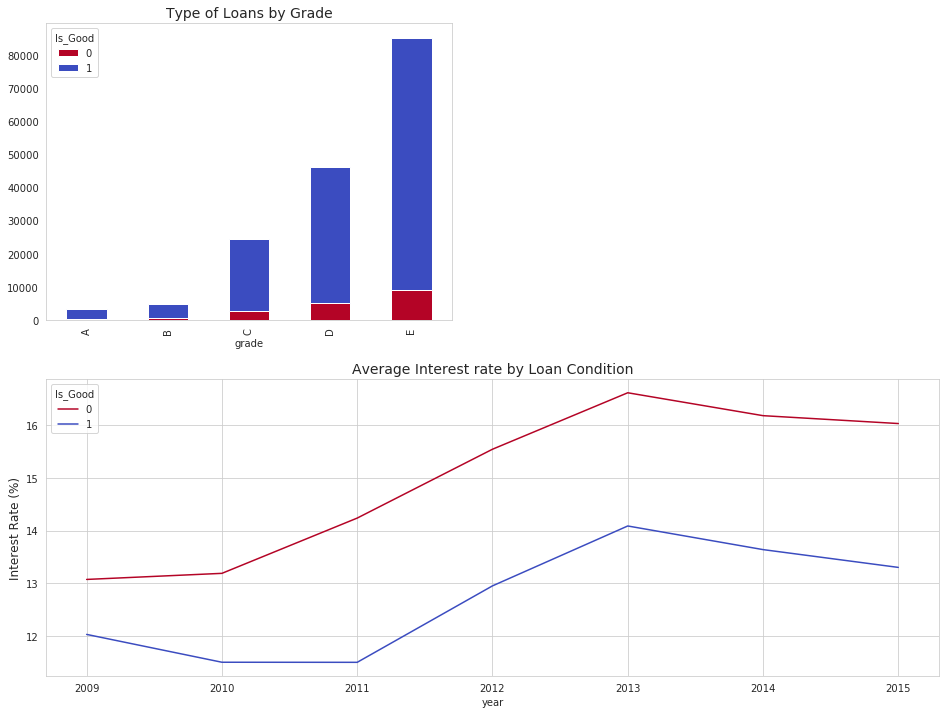

In [422]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade', 'Is_Good']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


by_interest = df.groupby(['year', 'Is_Good']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

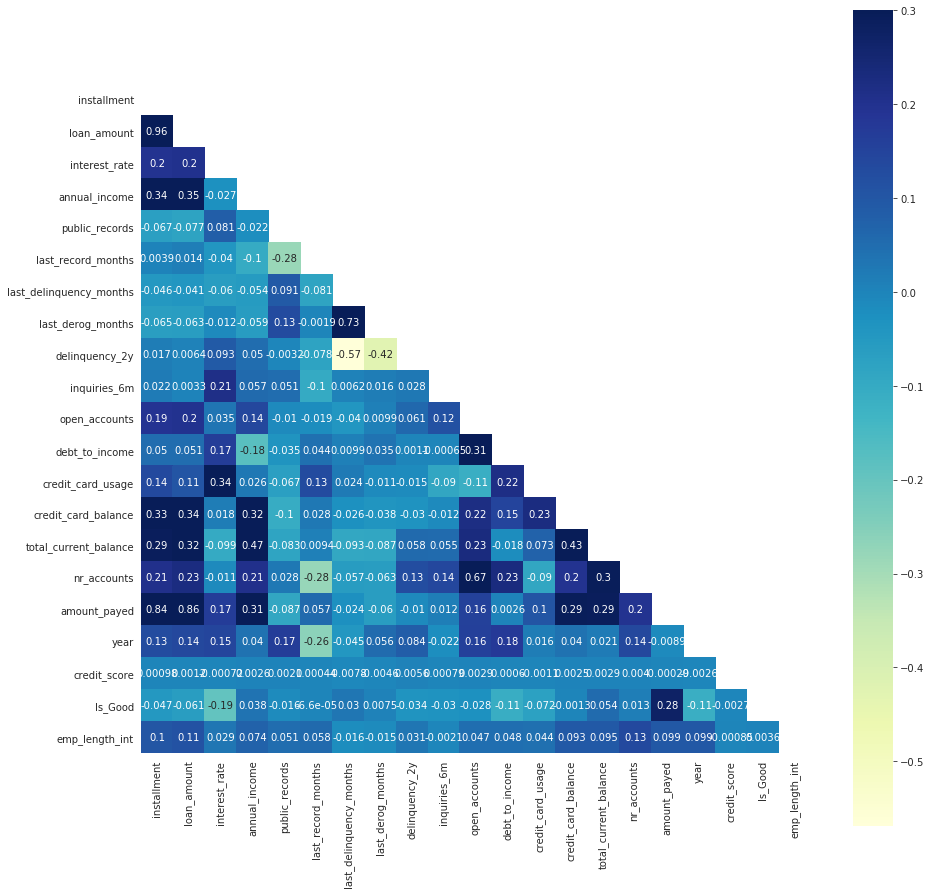

In [423]:
# Just get me the numeric variables
numeric_variables = df.select_dtypes(exclude=["object"])

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(df_corr, mask=mask, vmax=.3, square=True, cmap="YlGnBu",annot=True)


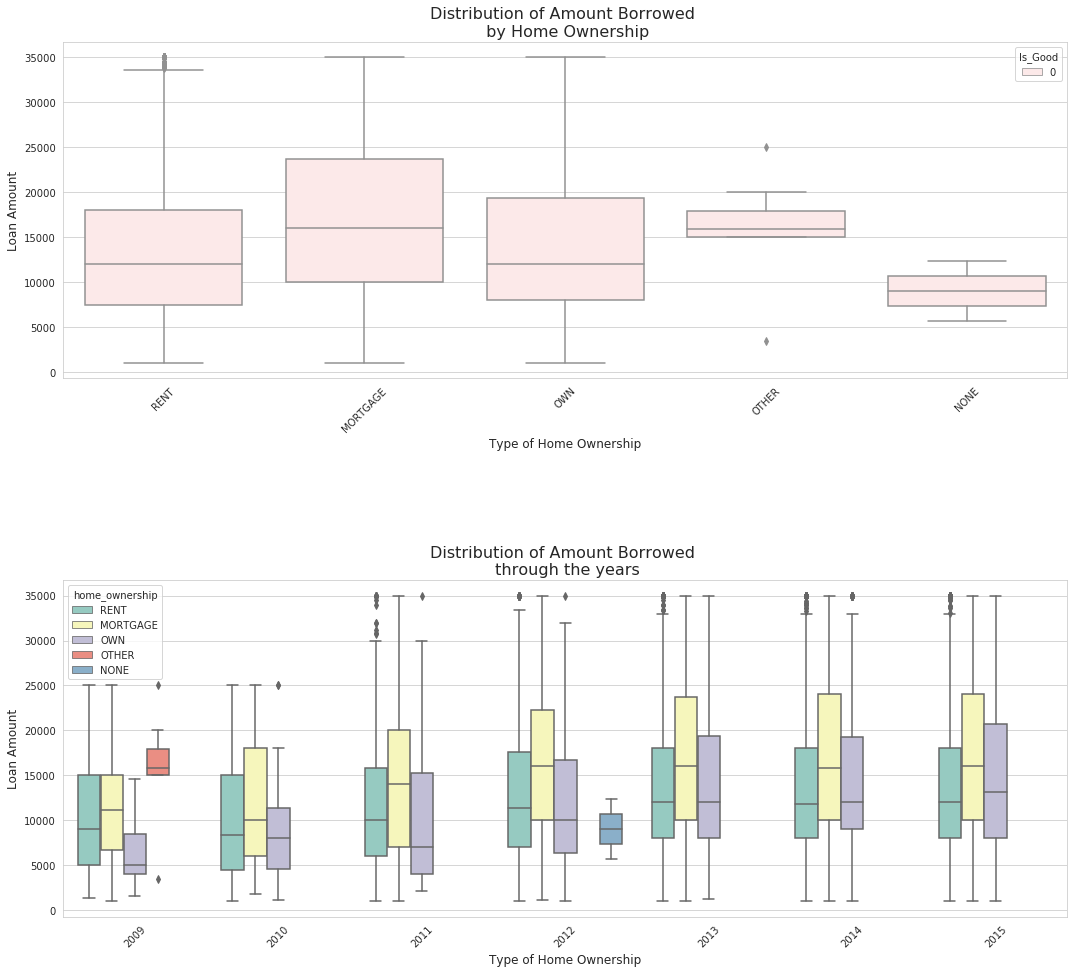

In [424]:
plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = df.loc[df['Is_Good'] == 0]

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='Is_Good',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amount', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [425]:
import plotly.offline as py

# Get the loan amount for loans that were defaulted by each region.

colors1 = ['dodgerblue', 'plum', 'Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen','gold', 'mediumturquoise', 'darkorange', 'lightgreen'] 
counts =  df[['loan_amount','Region']].loc[(df['Is_Good'] == 0)]
counts = counts.groupby(['Region'])['loan_amount'].sum()
labels = counts.index
values = counts.values

pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors1,line=dict(color='#000000', width=1)))
layout = go.Layout(title='Loans Amount Distribution by Regions')

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

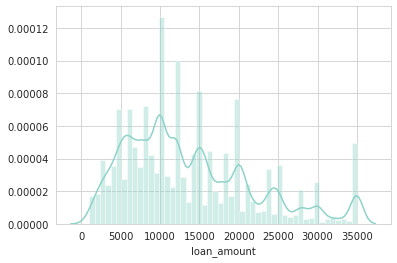

In [426]:
sns.distplot(df['loan_amount'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

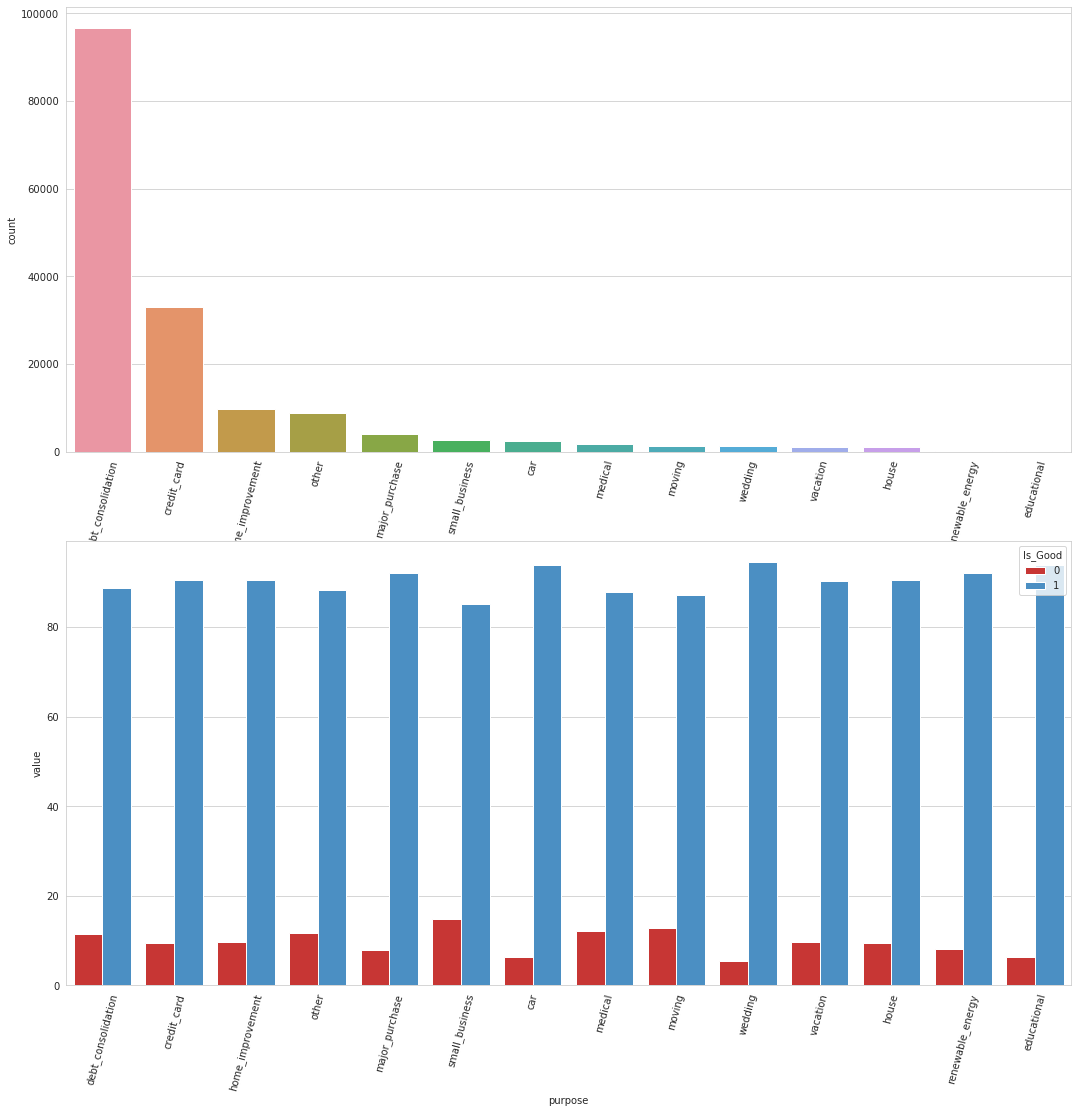

In [427]:
plt.figure(figsize=(18,18))


plt.subplot(211)
sns.countplot(df['purpose'], order=df['purpose'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=75)


palette = ["#E01E1B","#3791D7"]
plt.subplot(212)
purpose_condition = round(pd.crosstab(df['Is_Good'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)
# now stack and reset
stacked = purpose_condition.stack().reset_index().rename(columns={0:'value'})
 # plot grouped bar chart
sns.barplot(x=stacked.purpose, y=stacked.value, hue=stacked.Is_Good, palette=palette,order=df['purpose'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=75)


In [428]:
# Extracts the date and the time from a string variable that is in a given format.
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_credit_line'], format = '%m-%y',infer_datetime_format=True)

# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))




# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))


# Extracts the date and the time from a string variable that is in a given format.
df['issue_date'] = pd.to_datetime(df['issue_date'], format = '%m-%y',infer_datetime_format=True)
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2020-01-01') - df['issue_date']) / np.timedelta64(1, 'M')))



df.drop(['earliest_cr_line_date','issue_date','description','employment_length','County','credit_score','district','County','complete_date'],axis=1,inplace=True)

In [429]:
df['job_title'].fillna('unemployed', inplace=True)
df['last_delinquency_months'].fillna(0, inplace=True)
df['last_record_months'].fillna(0, inplace=True)
df['last_derog_months'].fillna(0, inplace=True)
df['credit_card_usage'].fillna(0, inplace=True)
df['total_current_balance'].fillna(0, inplace=True)

### Preprocessing Discrete Variables: Automating Calculaions

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164312 entries, 0 to 164311
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   installment                  164312 non-null  float64
 1   loan_amount                  164312 non-null  float64
 2   interest_rate                164312 non-null  float64
 3   term                         164312 non-null  int64  
 4   purpose                      164312 non-null  object 
 5   home_ownership               164312 non-null  object 
 6   annual_income                164312 non-null  float32
 7   job_title                    164312 non-null  object 
 8   earliest_credit_line         164312 non-null  object 
 9   public_records               164312 non-null  float64
 10  last_record_months           164312 non-null  float64
 11  last_delinquency_months      164312 non-null  float64
 12  last_derog_months            164312 non-null  float64
 13 

In [433]:
y = df['Is_Good']
x = df.drop(['Is_Good'],axis=1)

In [434]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [435]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

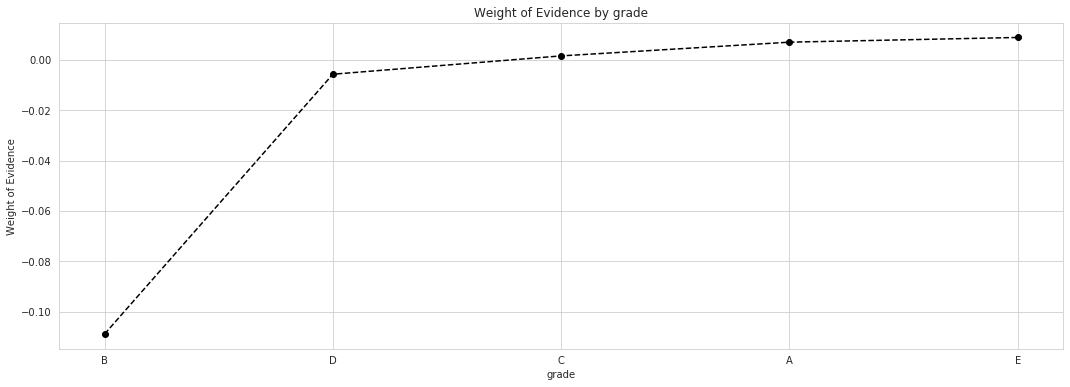

In [438]:
df_temp = woe_discrete(x, 'grade', y)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
plot_by_woe(df_temp)

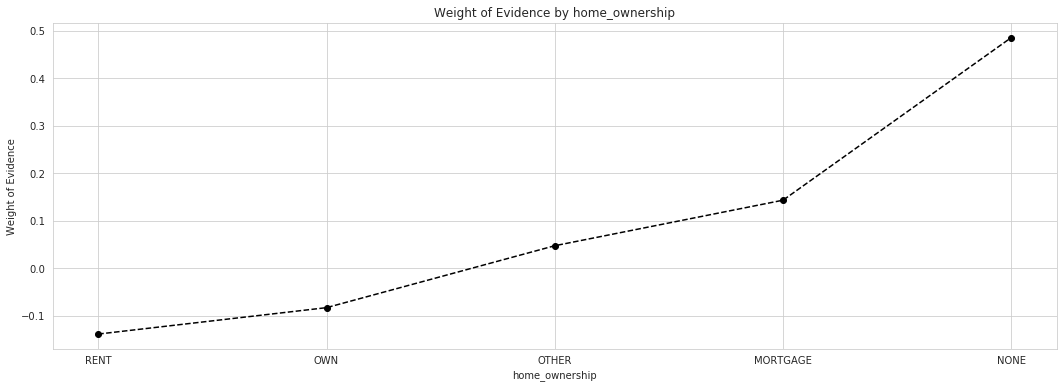

In [440]:
# 'home_ownership'
df_temp = woe_discrete(x, 'home_ownership', y)
# We calculate weight of evidence.
plot_by_woe(df_temp)

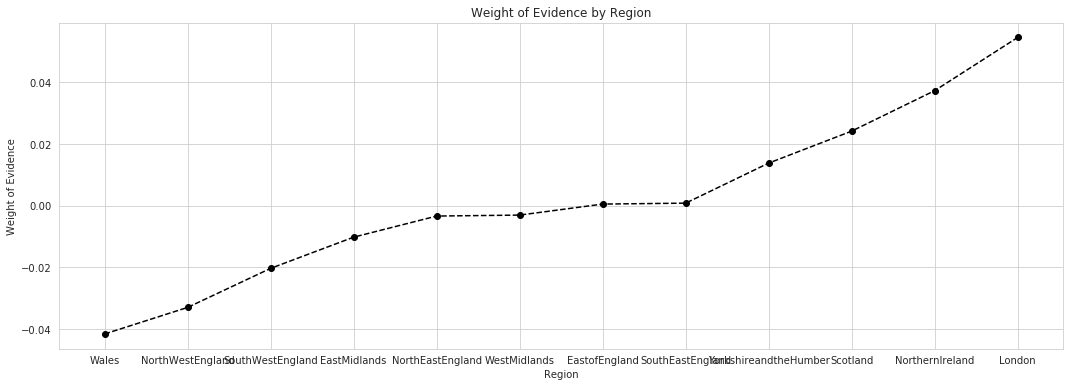

In [441]:
# 'home_ownership'
df_temp = woe_discrete(x, 'Region', y)
# We calculate weight of evidence.
plot_by_woe(df_temp)

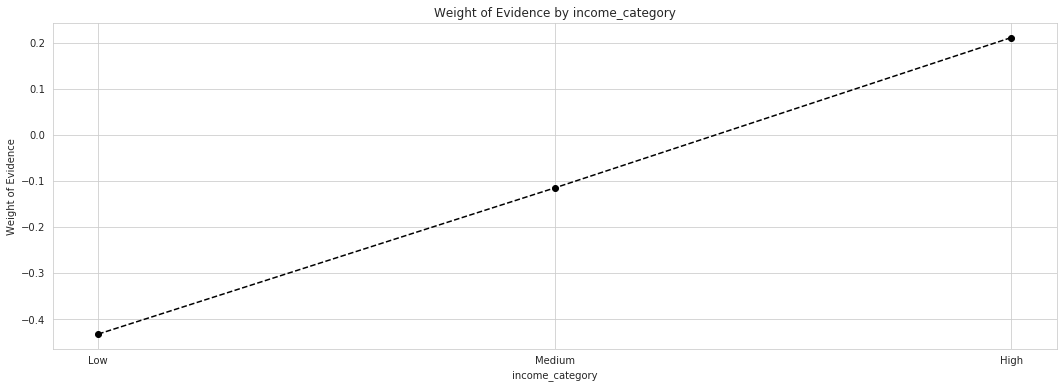

In [442]:
# 'home_ownership'
df_temp = woe_discrete(x, 'income_category', y)
# We calculate weight of evidence.
plot_by_woe(df_temp)
